In [ ]:
#CNN 기반 인공신경망 학습하기 

In [ ]:
#파이썬으로 시작하는 머신러닝+딥러닝_저자 강지영

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [3]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print("학습셋 shape:", X_train.shape)
print("학습셋: {0}개, 테스트셋: {1}개".format(X_train.shape[0], X_test.shape[0]))

학습셋 shape: (60000, 28, 28)
학습셋: 60000개, 테스트셋: 10000개


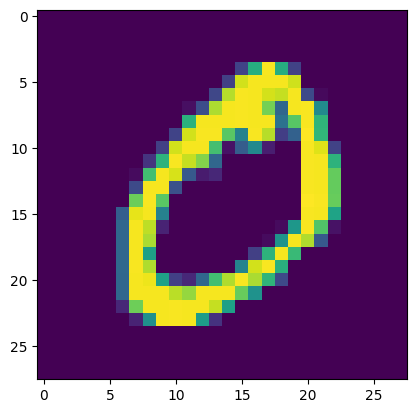

In [4]:
plt.imshow(X_train[1])
plt.show()

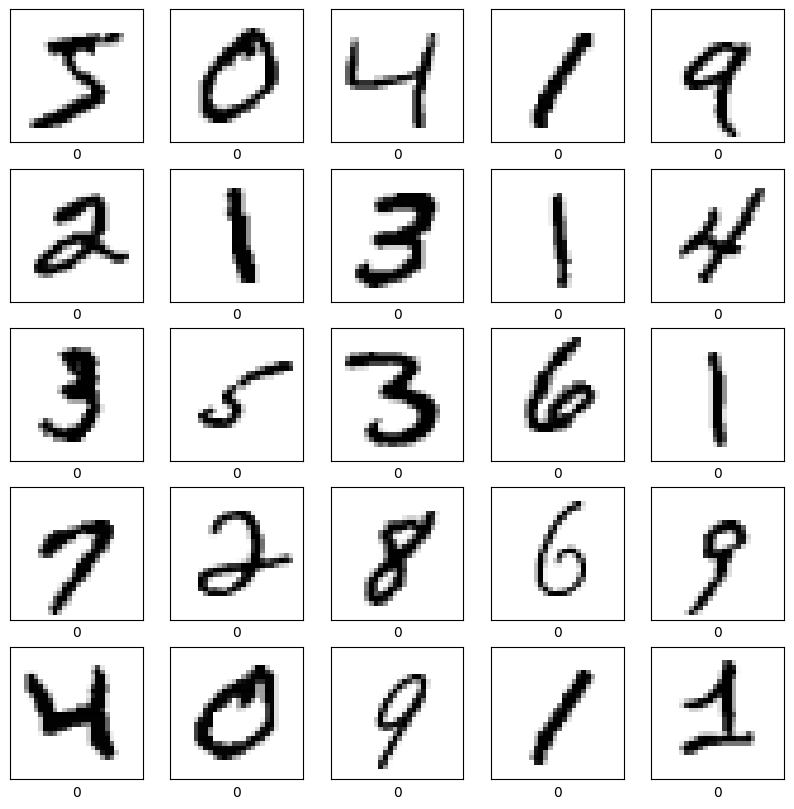

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(np.argmax(Y_train[i]))
plt.show()

In [6]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
for i in X_train[1]:
    for j in i:
        print(j, end=" ")
    print("\n")

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 51 159 253 159 50 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 0 48 238 252 252 252 237 0 0 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 0 0 54 227 253 252 239 233 252 57 6 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 10 60 224 252 253 252 202 84 252 253 122 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 0 163 252 252 252 253 252 252 96 189 253 167 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 0 51 238 253 253 190 114 253 228 47 79 255 168 0 0 0 0 0 0 

0 0 0 0 0 0 0 0 0 48 238 252 252 179 12 75 121 21 0 0 253 243 50 0 0 0 0 0 

0 0 0 0 0 0 0 0 38 165 253 233 208 84 0 0 0 0 0 0 253 252 165 0 0 0 0 0 

0 0 0 0 0 0 0 7 178 252 240 71 19 28 0 0 0 0 0 0 253 252 195 0 0 0 0 0 

0 0 0 0 0 0 0 57 252 252 63 0 0 0 0 0 0 0 0 0 253 252 195 0 0 0 0 0 

0 0 0 0 0 0 0 198 253 190 0 0 0 

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
for i in X_train[1]:
    for j in i:
        print(j, end="  ")
    print("\n")

0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.2  0.6235294117647059  0.9921568627450981  0.6235294117647059  0.19607843137254902  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.18823529411764706  0.9333333333333333  0.9882352941176471  0.9882352941176471  0.9882352941176471  0.9294117647058824  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [12]:

X_train.shape

(60000, 28, 28, 1)

In [13]:
Y_train[0]

np.uint8(5)

In [14]:
Y_train=to_categorical(Y_train)
Y_test=to_categorical(Y_test)

In [15]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [16]:
#컨볼루션 신경망의 성질

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

c:\Users\yues7\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
MODEL_DIR = "./model/"
os.makedirs(MODEL_DIR, exist_ok=True)

modelpath = "./model/{epoch:02d}-{val_loss:.4f}.weights.h5"
checkpointer = ModelCheckpoint(
    filepath=modelpath,
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    save_weights_only=True,   # 가중치만 저장
    mode="min"
)

early_stopping_callback = EarlyStopping(
    monitor="val_loss",
    patience=10,
    mode="min",
    restore_best_weights=True
)


In [19]:
#학습
# 모델의 실행
history = model.fit(X_train, Y_train, 
                    validation_data=(X_test, Y_test), 
                    epochs=30, batch_size=200, verbose=1,
                    callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))


Epoch 1/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8268 - loss: 0.5516
Epoch 1: val_loss improved from None to 0.06177, saving model to ./model/01-0.0618.weights.h5
300/300 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - accuracy: 0.9160 - loss: 0.2768 - val_accuracy: 0.9800 - val_loss: 0.0618
Epoch 2/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9717 - loss: 0.0983
Epoch 2: val_loss improved from 0.06177 to 0.04170, saving model to ./model/02-0.0417.weights.h5
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.9731 - loss: 0.0936 - val_accuracy: 0.9865 - val_loss: 0.0417
Epoch 3/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9781 - loss: 0.0707
Epoch 3: val_loss improved from 0.04170 to 0.03392, saving model to ./model/03-0.0339.weights.h5
300/300 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.9791 - loss: 0.0694 - val_accuracy: 0.9883 - val_loss: 0.0339
Epoch 4/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.9830 - loss: 0.0554
Epoch 

In [20]:

history.history

{'accuracy': [0.9160166382789612,
  0.9730833172798157,
  0.9790999889373779,
  0.9830833077430725,
  0.9844666719436646,
  0.9860166907310486,
  0.9877333045005798,
  0.9889000058174133,
  0.9902166724205017,
  0.9902666807174683,
  0.9915333390235901,
  0.9921666383743286,
  0.9921833276748657,
  0.9931666851043701,
  0.9926000237464905,
  0.9937000274658203,
  0.9937999844551086,
  0.9937999844551086,
  0.9939833283424377,
  0.9946666955947876,
  0.9948833584785461,
  0.9945666790008545,
  0.9951666593551636],
 'loss': [0.27679499983787537,
  0.09364620596170425,
  0.06943643093109131,
  0.05572174862027168,
  0.05130522698163986,
  0.044458042830228806,
  0.03940260782837868,
  0.03461349010467529,
  0.03155359998345375,
  0.030651697888970375,
  0.02650260552763939,
  0.02447878010571003,
  0.024225840345025063,
  0.021088285371661186,
  0.02143319696187973,
  0.01923203095793724,
  0.019335461780428886,
  0.017889775335788727,
  0.016707580536603928,
  0.016532564535737038,
  0.0

In [21]:
import pandas as pd

accuracy =  history.history['accuracy']
loss =  history.history['loss']
val_accuracy =  history.history['val_accuracy']
val_loss =  history.history['val_loss']

df = pd.DataFrame({'epochs' : range(len(accuracy)), 'accuracy': accuracy, 'loss': loss, 'val_accuracy': val_accuracy, 'val_loss': val_loss})

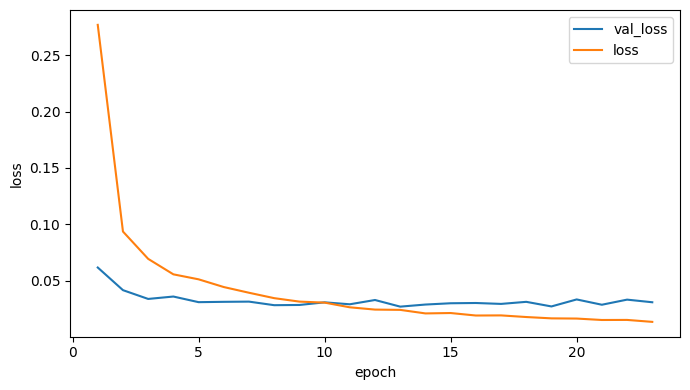

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(history.history)                # {'loss','val_loss',...} 포함
df['epochs'] = df.index + 1                       # epoch 번호 컬럼 생성
df = df[['epochs','loss','val_loss']]

# 3) 결측 제거 및 인덱스 초기화
plot_df = df.dropna(subset=['loss','val_loss']).reset_index(drop=True)

# 4) 선 그래프 그리기
plt.figure(figsize=(7,4))
ax = sns.lineplot(data=plot_df, x='epochs', y='val_loss', label='val_loss')
sns.lineplot(data=plot_df, x='epochs', y='loss', label='loss', ax=ax)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.legend()
plt.tight_layout()
plt.show()